# Clustering Crypto

In [27]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pathlib import Path


### Fetching Cryptocurrency Data

In [28]:
# Use the provided csv file:
file_path = Path("Resources/crypto_data.csv")

# Create a DataFrame
crypto_data_df = pd.read_csv(file_path, index_col = 0)
crypto_data_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


### Data Preprocessing

In [29]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
crypto_data_df.columns


Index(['CoinName', 'Algorithm', 'IsTrading', 'ProofType', 'TotalCoinsMined',
       'TotalCoinSupply'],
      dtype='object')

In [30]:
# Keep only cryptocurrencies that are trading
crypto_data_df = crypto_data_df.loc[crypto_data_df["IsTrading"] == True]
crypto_data_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [31]:
# Keep only cryptocurrencies with a working algorithm
crypto_data_df = crypto_data_df.loc[crypto_data_df["Algorithm"] != "N/A"]
crypto_data_df


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [32]:
# Remove the 'IsTrading' column
crypto_data_df.drop("IsTrading", axis = 1, inplace = True)
crypto_data_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [33]:
# Remove rows with at least 1 null value
crypto_data_df.dropna(axis = 0, inplace = True)
crypto_data_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [34]:
# Remove rows with cryptocurrencies having no coins mined
crypto_data_df = crypto_data_df.loc[crypto_data_df["TotalCoinsMined"] != 0]
crypto_data_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [35]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
coin_name_df = pd.DataFrame(data = crypto_data_df, columns = ["CoinName"])
crypto_data_df.drop("CoinName", axis = 1, inplace = True)
crypto_data_df


C:\Users\GuilleMGN\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [36]:
# Create dummy variables for text features
X = pd.get_dummies(data = crypto_data_df, columns = ["Algorithm", "ProofType"])
print(X.shape)
X.head()

(533, 100)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Standardize data
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.11674788, -0.15286468, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.09358885, -0.14499604, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [ 0.52587231,  4.4937636 , -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       ...,
       [-0.09523411, -0.13215444, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11658774, -0.15255408, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11674507, -0.15284989, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ]])

### Reducing Dimensions Using PCA

In [38]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components = 3)
crypto_pca = pca.fit_transform(X)

In [39]:
# Create a DataFrame with the principal components data
pca_df = pd.DataFrame(data = crypto_pca, columns = ["PC 1", "PC 2", "PC 3"], index = X.index)
pca_df.head()

,PC 1,PC 2,PC 3
42,-1.161008e+10,-5.638477e+08,0.814398
404,-1.062159e+10,-1.211416e+09,0.814155
1337,2.750664e+11,1.312312e+11,0.989790
BTC,-1.158292e+10,-5.688662e+08,-0.712944
ETH,-1.155621e+10,-6.570914e+08,-0.706109


### Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [40]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x = "k", y = "inertia", xticks = k, title = "Elbow Curve")

C:\Users\GuilleMGN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [41]:
# Initialize the K-Means model
model = KMeans(n_clusters = 4, random_state = 0)

# Fit the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
pca_df["class"] = model.labels_
new_df = pd.concat([crypto_data_df, pca_df, coin_name_df], axis = 1)
new_df


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class,CoinName
42,Scrypt,PoW/PoS,4.199995e+01,42,-1.161008e+10,-5.638477e+08,0.814398,0,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-1.062159e+10,-1.211416e+09,0.814155,0,404Coin
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.750664e+11,1.312312e+11,0.989790,3,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,21000000,-1.158292e+10,-5.688662e+08,-0.712944,0,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0,-1.155621e+10,-6.570914e+08,-0.706109,0,Ethereum
...,...,...,...,...,...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000,-8.877840e+09,-1.295211e+09,0.025803,0,ZEPHYR
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,-1.138613e+10,-4.517219e+08,0.814591,0,Gapcoin
BDX,CryptoNight,PoW,9.802226e+08,1400222610,-9.907298e+09,-7.122054e+08,-0.742058,0,Beldex
ZEN,Equihash,PoW,7.296538e+06,21000000,-1.158824e+10,-5.596611e+08,-0.713085,0,Horizen


### Visualizing Results

#### 3D-Scatter with Clusters

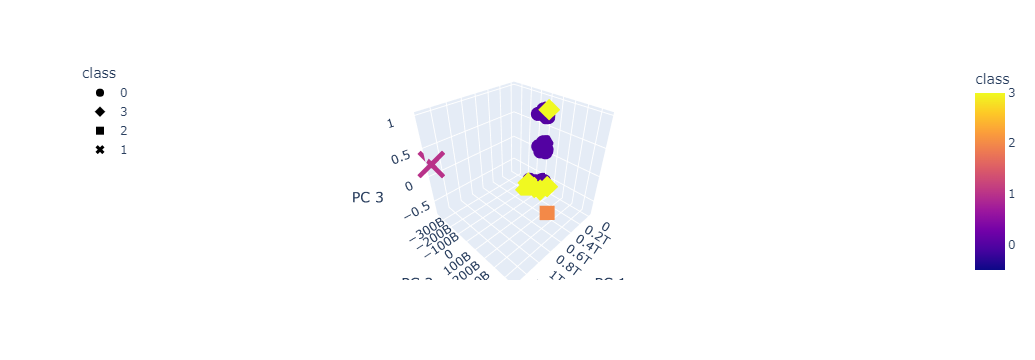

In [42]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    new_df,
    x = "PC 1",
    y = "PC 2",
    z = "PC 3",
    hover_name = "CoinName",
    hover_data = ["Algorithm"],
    color = "class",
    symbol = "class",
)
fig.update_layout(legend = dict(x = 0, y = 1))
fig.show()


#### Table of Tradable Cryptocurrencies

In [43]:
# Table with tradable cryptos
new_df.hvplot.table(columns=["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "class"])


:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

In [49]:
# Print the total number of tradable cryptocurrencies
total = new_df["CoinName"].count()
print(f"The total number of tradable cryptocurrencies are: {total}.")

The total number of tradable cryptocurrencies are: 533.


#### Scatter Plot with Tradable Cryptocurrencies

In [50]:
# Scale data to create the scatter plot
scaler_2 = StandardScaler()
scaler_2.fit_transform(new_df[["TotalCoinSupply", "TotalCoinsMined"]])

array([[-0.15286468, -0.11674788],
       [-0.14499604, -0.09358885],
       [ 4.4937636 ,  0.52587231],
       ...,
       [-0.13215444, -0.09523411],
       [-0.15255408, -0.11658774],
       [-0.15284989, -0.11674507]])

In [51]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
new_df.hvplot.scatter(y = "TotalCoinsMined", x = "TotalCoinSupply")

:Scatter   [TotalCoinSupply]   (TotalCoinsMined)